# MotoGP
Za projekt pri predmetu Programiranje 1 bom analizirala dirke v zgodovini tekmovanja MotoGP. Podatke sem dobila na strani [Autosport](http://classic.autosport.com/results.php?s=80&y=0&c=0), kjer sem zajela rezultate vseh dirk v kraljevem razredu od začetka tekmovanja, leta 1949, do konca sezone 2016, ter skupne rezultate teh sezon.
## Zajeti podatki
### Rezultati dirk:
- leto
- dirka
- prvi trije in njihovi motocikli

### Skupni rezultati:
- leto
- prvak
- podprvak
- zmagovalno moštvo
- drugo moštvo

## Analiza
Na podlagi rezultatov dirk bom določila dirkače in moštva z največ zmagami (ter drugimi in tretjimi mesti) in na podlagi skupnih rezultatov dirkače in proizvajalce z največ naslovi. Poiskala bom dirkališča, na katerih je potekalo največ dirk in dirkače ter moštva, ki so na njih najboljša. Za konec bom ugotovila, ali je zmagovalec največ dirk v sezoni vedno tudi prvak, oziroma kako pogosto se to zgodi.

In [39]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

Poglejmo si tabeli s podatki o dirkah in skupnih rezultatih.

In [40]:
rezultati_dirk = pd.read_csv('csv-datoteke/rezultati_dirk.csv')
rezultati_dirk

,Leto,Dirka,Zmagovalec,Mostvo_zmagovalca,Drugi,Mostvo_drugega,Tretji,Mostvo_tretjega
0,1949,Tourist Trophy,Harold Daniell,Norton,Johnny Lockett,Norton,Ernie Lyons,Velocette
1,1949,Switzerland,Leslie Graham,AJS,Arciso Artesiani,Gilera,Harold Daniell,Norton
2,1949,Netherlands,Nello Pagani,Gilera,Leslie Graham,AJS,Arciso Artesiani,Gilera
3,1949,Belgium,William Doran,AJS,Arciso Artesiani,Gilera,Enrico Lorenzetti,Moto Guzzi
4,1949,Ulster,Leslie Graham,AJS,Artie Bell,Norton,Nello Pagani,Gilera
5,1949,Nations,Nello Pagani,Gilera,Arciso Artesiani,Gilera,William Doran,AJS
6,1950,Tourist Trophy,Geoff Duke,Norton,Artie Bell,Norton,Johnny Lockett,Norton
7,1950,Belgium,Umberto Masetti,Gilera,Nello Pagani,Gilera,Edward Frend,AJS
8,1950,Netherlands,Umberto Masetti,Gilera,Nello Pagani,Gilera,Harry Hinton Sr.,Norton
9,1950,Switzerland,Leslie Graham,AJS,Umberto Masetti,Gilera,Carlo Bandirola,Gilera


In [41]:
skupni_rezultati = pd.read_csv('csv-datoteke/skupni_rezultati.csv',index_col = 'Leto' )
skupni_rezultati

,Prvak,Podprvak,Prvi_proizvajalec,Drugi_proizvajalec
Leto,,,,
1949,Leslie Graham,Nello Pagani,AJS,Gilera
1950,Umberto Masetti,Geoff Duke,Norton,Gilera
1951,Geoff Duke,Alfredo Milani,Norton,Gilera
1952,Umberto Masetti,Leslie Graham,Gilera,Norton
1953,Geoff Duke,Reg Armstrong,Gilera,Norton
1954,Geoff Duke,Ray Amm,Gilera,Norton
1955,Geoff Duke,Reg Armstrong,Gilera,MV Agusta
1956,John Surtees,Walter Zeller,MV Agusta,Gilera
1957,Libero Liberati,Bob McIntyre,Gilera,MV Agusta


### Posamezne zmage
Naredimo tabelo, ki razporedi dirkače glede na največ zmag na posameznih dirkah, iz nje pa je razvidno tudi kolikokrat so bili dirkači drugi in tretji.

In [42]:
najvec_zmag = rezultati_dirk['Zmagovalec'].value_counts()
najvec_drugih = rezultati_dirk['Drugi'].value_counts()
najvec_tretjih = rezultati_dirk['Tretji'].value_counts()

dirkaci = {'1. Zmage': najvec_zmag, '2. Druga mesta': najvec_drugih, '3. Tretja mesta': najvec_tretjih}

tabela_dirkacev = pd.DataFrame(dirkaci).fillna(0).astype(int).sort_values('1. Zmage', ascending = False)
tabela_dirkacev[:20]

,1. Zmage,2. Druga mesta,3. Tretja mesta
Valentino Rossi,88,55,42
Giacomo Agostini,68,20,0
Mick Doohan,54,31,10
Jorge Lorenzo,44,42,21
Casey Stoner,38,11,20
Mike Hailwood,37,9,2
Eddie Lawson,31,31,16
Dani Pedrosa,29,38,36
Marc Marquez,29,15,7
Kevin Schwantz,25,13,13


Po tabeli naredimo graf najuspešnejših desetih dirkačev.

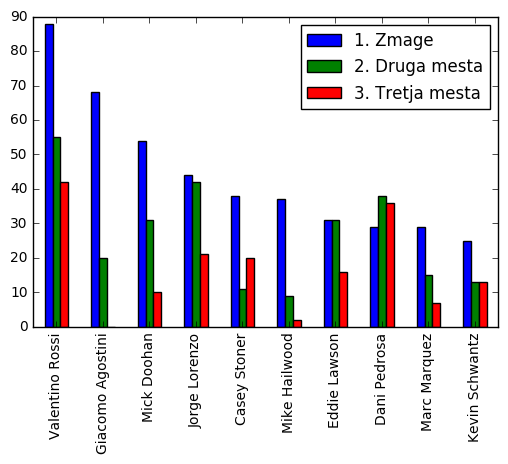

In [43]:
tabela_dirkacev[:10].plot(kind = 'bar')

Poglejmo število zmag, drugih in tretjih mest za posamezna moštva.

In [44]:
mostva_zmage = rezultati_dirk['Mostvo_zmagovalca'].value_counts()
mostva_druga = rezultati_dirk['Mostvo_drugega'].value_counts()
mostva_tretja = rezultati_dirk['Mostvo_tretjega'].value_counts()

dirkaci = {'1. Zmage': mostva_zmage, '2. Druga mesta': mostva_druga, '3. Tretja mesta': mostva_tretja}

tabela_mostev = pd.DataFrame(dirkaci).fillna(0).astype(int).sort_values('1. Zmage', ascending = False)
tabela_mostev[:10]

,1. Zmage,2. Druga mesta,3. Tretja mesta
Honda,279,263,246
Yamaha,222,241,221
MV Agusta,139,52,22
Suzuki,91,91,100
Gilera,35,36,27
Ducati,33,29,43
Norton,21,47,65
AJS,5,7,2
Cagiva,3,4,8
Matchless,3,25,30


### Naslovi
Zanima nas tudi, kateri dirkači so osvojili največ naslovov in podnaslovov.

In [45]:
prvaki = skupni_rezultati['Prvak'].value_counts()
podprvaki = skupni_rezultati['Podprvak'].value_counts()
skupno = {'Naslovi': prvaki, 'Podnaslovi': podprvaki}

tabela_skupno = pd.DataFrame(skupno).fillna(0).astype(int).sort_values('Naslovi', ascending = False)
tabela_skupno[:10]

,Naslovi,Podnaslovi
Giacomo Agostini,8,1
Valentino Rossi,7,5
Mick Doohan,5,2
Mike Hailwood,4,3
Geoff Duke,4,1
John Surtees,4,0
Eddie Lawson,4,1
Marc Marquez,3,0
Kenny Roberts,3,1
Jorge Lorenzo,3,3


Isto naredimo za naslove in podnaslove proizvajalcev.

In [46]:
proizvajalci_naslovi = skupni_rezultati['Prvi_proizvajalec'].value_counts()
proizvajalci_podnaslovi = skupni_rezultati['Drugi_proizvajalec'].value_counts()
skupno = {'Naslovi': proizvajalci_naslovi, 'Podnaslovi': proizvajalci_podnaslovi}

proizvajalci_skupno = pd.DataFrame(skupno).fillna(0).astype(int).sort_values('Naslovi', ascending = False)
proizvajalci_skupno

,Naslovi,Podnaslovi
Honda,22,12
MV Agusta,16,5
Yamaha,14,27
Suzuki,7,4
Gilera,5,5
Norton,2,10
AJS,1,0
Ducati,1,2
Kawasaki,0,1
Linto,0,1


Zanimivo bi bilo videti graf uspešnosti proizvajalcev.

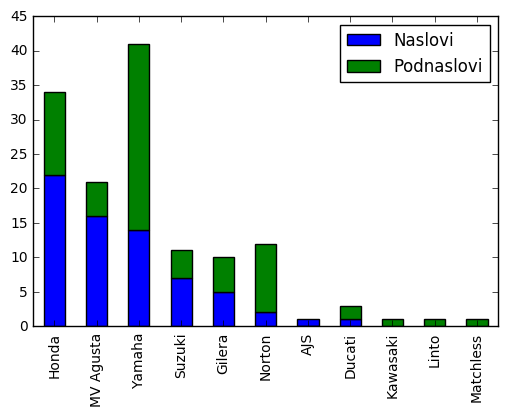

In [47]:
proizvajalci_skupno.plot(kind = 'bar', stacked=True)

### Analiza posameznih dirk
Poglejmo najprej katere dirke so se izvedle največkrat.

In [48]:
najpogostejse_dirke = rezultati_dirk['Dirka'].value_counts()
najpogostejse_dirke[:20]

Netherlands       68
Germany           62
France            53
Spain             49
Nations           41
Belgium           41
Great Britain     40
Japan             30
Australia         28
Tourist Trophy    28
Italy             26
Malaysia          25
Austria           25
Czech Republic    24
Ulster            22
Sweden            21
Catalunya         21
Finland           20
San Marino        19
Valencia          18
Name: Dirka, dtype: int64

Vidimo lahko, da se je število dirk v sezoni s časom povečevalo.

In [49]:
rezultati_dirk['Leto'].value_counts()

2016    18
2014    18
2013    18
2012    18
2010    18
2008    18
2007    18
2015    18
2011    17
2009    17
        ..
1952     8
1953     8
1954     8
1958     7
1959     7
1960     7
1956     6
1957     6
1950     6
1949     6
Name: Leto, dtype: int64

Da bomo imeli lažjo predstavo o porazdelitvi dirk po desetletjih si poglejmo tortni diagram.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07D04C70>], dtype=object)

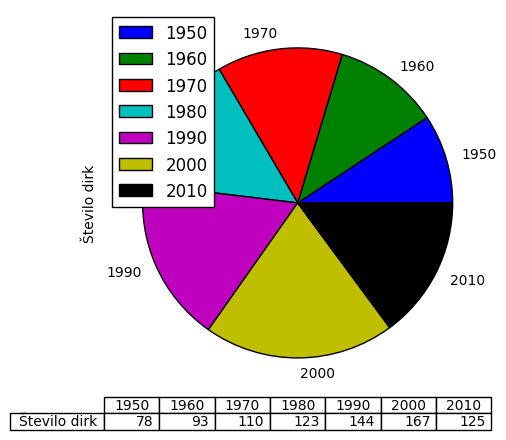

In [50]:
desetletja = {'1950': 0, '1960': 0, '1970': 0, '1980': 0, '1990': 0, '2000': 0, '2010': 0}

for leto in rezultati_dirk['Leto']:
    if leto == 1949 or '195' in str(leto):
        desetletja['1950'] += 1
    elif '196' in str(leto):
        desetletja['1960'] += 1
    elif '197' in str(leto):
        desetletja['1970'] += 1
    elif '198' in str(leto):
        desetletja['1980'] += 1
    elif '199' in str(leto):
        desetletja['1990'] += 1
    elif '200' in str(leto):
        desetletja['2000'] += 1
    else:
        desetletja['2010'] += 1


pd.DataFrame({'Število dirk': desetletja}).plot(kind = 'pie', figsize=(5, 5), subplots= True, table = True)

Opomba: Ker smo končali šele sezono 2016, je število dirk v tem desetletju manjše kot v prejšnjem. Ker pa nam preostanejo še tri sezone, lahko sklepamo, da bo po končanem desetletju (ob istem ali večjem tempu), število dirk še večje kot v prejšnjem, kar potrdi našo hipotezo, da se število dirk s časom zvišuje.

Za deset najpogosteje izvedenih dirk ugotovimo, kateremu dirkaču in kateremu moštvu najbolj ležijo, ter koliko zmag je najboljši dirkač tam dosegel.

In [51]:
dirke = najpogostejse_dirke.axes[0][:10]
dirkaci = tabela_dirkacev.axes[0]
mostva = tabela_mostev.axes[0]

imenik_dirkacev = {}
imenik_mostev = {}
zmage = {}
for dirka in dirke:
    ta_dirka = rezultati_dirk['Dirka'] == dirka
    rez_ta_dirka = rezultati_dirk[ta_dirka]
    imenik_dirkacev[dirka] = rez_ta_dirka['Zmagovalec'].value_counts().idxmax()
    imenik_mostev[dirka] = rez_ta_dirka['Mostvo_zmagovalca'].value_counts().idxmax()
    zmage[dirka] = max(rez_ta_dirka['Zmagovalec'].value_counts())

    
pd.DataFrame({'Število dirk': najpogostejse_dirke[:10], 'Najboljši dirkač': imenik_dirkacev, 
            'Najboljše moštvo': imenik_mostev, 'Št. zmag najboljšega': zmage}).sort_values('Število dirk', ascending=False)

,Najboljše moštvo,Najboljši dirkač,Št. zmag najboljšega,Število dirk
Netherlands,Honda,Valentino Rossi,7,68
Germany,Honda,Giacomo Agostini,8,62
France,Honda,Jorge Lorenzo,5,53
Spain,Honda,Valentino Rossi,7,49
Belgium,MV Agusta,Giacomo Agostini,8,41
Nations,MV Agusta,Giacomo Agostini,6,41
Great Britain,Honda,Valentino Rossi,6,40
Japan,Honda,Kevin Schwantz,4,30
Australia,Honda,Valentino Rossi,6,28
Tourist Trophy,MV Agusta,Mike Hailwood,6,28


### Povezava med največ zmagami in naslovom
Naredimo tabelo, ki nam za vsako leto pove, kdo je zmagal največ dirk in kakšen odstotek vseh dirk je to bil.

In [59]:
najvec_zmag = {}
odstotek_zmag = {}
for leto in range(1949, 2017):
    to_leto = rezultati_dirk['Leto'] == leto
    dirke_letos = rezultati_dirk[to_leto]
    najvec_zmag[leto] = dirke_letos['Zmagovalec'].value_counts().idxmax()
    st_zmaganih = max(dirke_letos['Zmagovalec'].value_counts())
    st_vseh = rezultati_dirk['Leto'].value_counts()[leto]
    odstotek_zmag[leto] = round(int(st_zmaganih) / st_vseh.astype(float) * 100, 1)




zmagovalec_leta = pd.DataFrame({'Največ zmag': najvec_zmag, 'Odstotek zmag najboljšega': odstotek_zmag})
zmagovalec_leta

,Največ zmag,Odstotek zmag najboljšega
1949,Leslie Graham,33.3
1950,Geoff Duke,50.0
1951,Geoff Duke,50.0
1952,Leslie Graham,25.0
1953,Geoff Duke,50.0
1954,Geoff Duke,62.5
1955,Geoff Duke,50.0
1956,John Surtees,50.0
1957,Libero Liberati,66.7
1958,John Surtees,85.7


Če te podatke predstavimo z grafom, lahko vidimo, kdaj je imel nek dirkač absolutno premoč in v katerih sezonah je bilo veliko različnih zmagovalcev. Sklepamo lahko, da so bile sezone z nižjimi vrednostmi na grafu za gledalce bolj zanimive, saj so bile dirke zaradi več favoritov bolj napete.

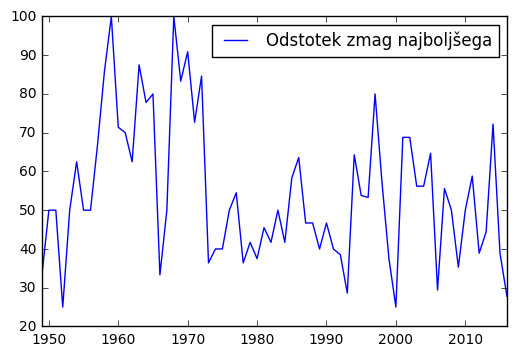

In [60]:
zmagovalec_leta.plot(kind = 'line')

Sedaj pa primerjajmo, kdaj sta si dirkač z največ zmagami in prvak sezone različna.

In [61]:
najvec_zmag = {}
prvak = {}
for leto in range(1949, 2017):
    if zmagovalec_leta['Največ zmag'][leto] != skupni_rezultati['Prvak'][leto]:
        najvec_zmag[leto] = zmagovalec_leta['Največ zmag'][leto]
        prvak[leto] = skupni_rezultati['Prvak'][leto]

tabela_razlik = pd.DataFrame({'Prvak': prvak, 'Največ zmag': najvec_zmag})

Upoštevati moramo, da imata lahko dva dirkača isto število zmag, mi pa smo za tistega z največ zmagami vzeli le enega izmed njiju. Zato poglejmo v katerih od teh primerov sta dirkača izenačena in v resnici nima nihče več zmag od prvaka.

In [64]:
sta_izenacena = {}
for leto in tabela_razlik.axes[0]:
    to_leto = rezultati_dirk['Leto'] == leto
    dirke_letos = rezultati_dirk[to_leto]
    st_zmaganih = dirke_letos['Zmagovalec'].value_counts()[tabela_razlik['Prvak'][leto]]
    st_vseh = rezultati_dirk['Leto'].value_counts()[leto]
    odstotek_prvaka = round(int(st_zmaganih) / st_vseh.astype(float) * 100, 1)
    odstotek_najveckrat = zmagovalec_leta['Odstotek zmag najboljšega'][leto]
    if odstotek_prvaka == odstotek_najveckrat:
        sta_izenacena[leto] = 'Da'
    else:
        sta_izenacena[leto] = 'Ne'


tabela_razlik2 = pd.DataFrame({'Prvak': prvak, 'Največ zmag': najvec_zmag, 'Sta izenačena?': sta_izenacena})
tabela_razlik2

,Največ zmag,Prvak,Sta izenačena?
1950,Geoff Duke,Umberto Masetti,Ne
1952,Leslie Graham,Umberto Masetti,Da
1983,Kenny Roberts,Freddie Spencer,Da
1984,Freddie Spencer,Eddie Lawson,Ne
1989,Kevin Schwantz,Eddie Lawson,Ne
1992,Mick Doohan,Wayne Rainey,Ne
1993,Wayne Rainey,Kevin Schwantz,Da
2006,Valentino Rossi,Nicky Hayden,Ne
2012,Dani Pedrosa,Jorge Lorenzo,Ne
2013,Jorge Lorenzo,Marc Marquez,Ne


Ugotovimo, da je v 68 sezonah tekmovanja, samo sedemkrat naslov osvojil dirkač, ki ni zmagal največ dirk. Tako lahko predvidevamo, da bo dirkač z največ zmagami, tudi prvak, ne moramo pa tega vzeti kot pravilo.